# Assessment Problems

## Problem 1: Data from yfinance


https://github.com/ranaroussi/yfinance


In [31]:
# Dates and times.
import datetime as dt

# Data frames.
import pandas as pd

# Yahoo finance data.
import yfinance as yf


In [32]:
# Tickers:
 # A list of stock symbols used to find data from yfinance

# Get data : 
# The get_data function enables retrieval of pricing snapshots, as well as fundamental and reference data, in a single call.
# See: https://cdn.refinitiv.com/public/rd-lib-python-doc/1.0.0.0/book/en/sections/access-layer/access/get-data-function.html
# period an interval used to obtain historical data

# Download data:
# This function uses the yfinance Python library to download historical stock data.
# See: https://medium.com/%40anjalivemuri97/day-4-fetching-historical-stock-data-with-yfinance-f45f3bd8b9c6
# I use auto_adjust=True, to omit the future warning
# See: https://github.com/ranaroussi/yfinance/blob/0713d9386769b168926d3959efd8310b56a33096/yfinance/utils.py#L445-L462

# DataFrame:
# It’s widely used for data analysis, cleaning, and visualization.Supports filtering, sorting, aggregation, and analysis
# See: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html

In [33]:
# Get historical data for multiple tickers at once:
tickers = ["META", "AAPL", "AMZN", "NFLX", "GOOGL"]

# Get data:
def get_data(tickers, period="5d", interval="1h"): 
    data = yf.download(tickers, period=period, interval=interval, group_by='ticker', auto_adjust=True) 
    return data
df=get_data(tickers,period="5d", interval="1d")

[*********************100%***********************]  5 of 5 completed


In [34]:
# Saving data into csv file:
# See: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_csv.html 

# Date time:
# Used to record the exact date and time
# See: https://docs.python.org/3/library/datetime.html

In [35]:
filename = "data/" + dt.datetime.now().strftime("%Y%m%d-%H%M%S") + ".csv"
df.to_csv(filename)
print("Saved:", filename)


Saved: data/20251111-113744.csv


## Problem 2: Plotting Data

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import os
from datetime import datetime


In [ ]:
# ....

In [ ]:
def plot_data():
    # Ensure folders exist
    data_folder = "data"
    plots_folder = "plots"
    os.makedirs(plots_folder, exist_ok=True)

    # Find the latest data file
    data_files = [os.path.join(data_folder, f) for f in os.listdir(data_folder) if f.endswith(".csv")]
    latest_file = max(data_files, key=os.path.getmtime)

    # Read CSV, skip first header row
    df = pd.read_csv(latest_file, header=1)
    
    # Rename 'Price' column to 'Date'
    df.rename(columns={'Price': 'Date'}, inplace=True)

    # Convert the 'Date' column to datetime format
    df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d', errors='coerce')

    # Drop any rows where Date could not be parsed
    df = df.dropna(subset=['Date'])
        

In [ ]:
# .... zmienialam by kolory plotu mialy nazwy tickersow, 
# kolumny nie czytaly close row tylko headers musialam to zmienic


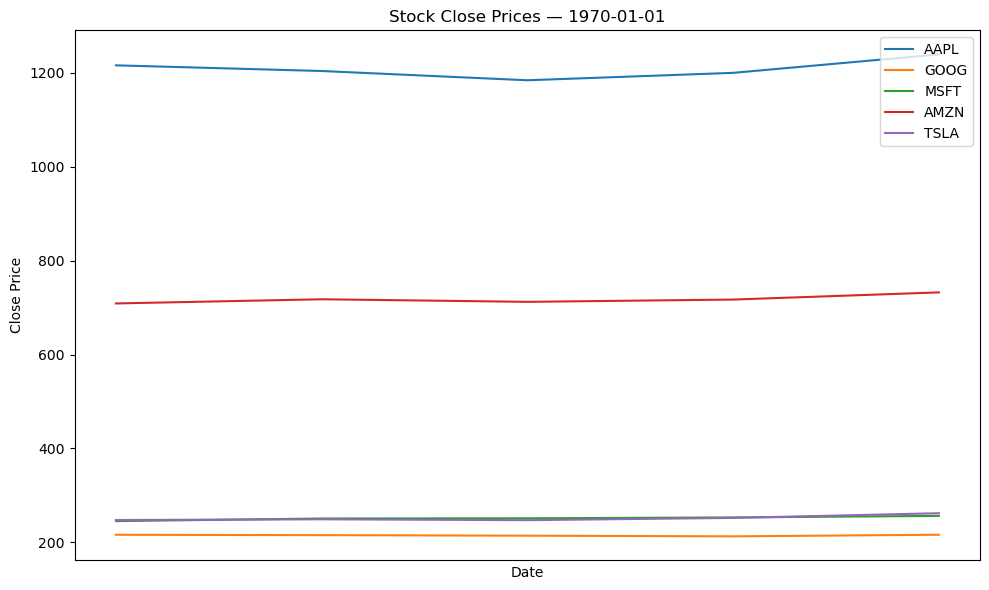

In [ ]:
# Find columns that contain 'Close'
close_cols = [col for col in df.columns if 'Close' in col]

# Define stock tickers corresponding to Close columns
tickers = ['AAPL', 'GOOG', 'MSFT', 'AMZN', 'TSLA']

# Convert index to datetime 
df.index = pd.to_datetime(df.index, errors='coerce')

# Plot Close columns
plt.figure(figsize=(10, 6))
for col, ticker in zip(close_cols, tickers):
        plt.plot(df.index, df[col], label=ticker)

# Add labels, title, legend
plt.title(f"Stock Close Prices — {df.index.max().strftime('%Y-%m-%d')}")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.legend()
plt.tight_layout()

In [ ]:
# ...

In [ ]:
# Plots folder defined
plots_folder = "plots"
os.makedirs(plots_folder, exist_ok=True)

# Save with filename format YYYYMMDD-HHmmss.png
timestamp = datetime.now().strftime("%Y%m%d-%H%M%S")
plot_filename = os.path.join(plots_folder, f"{timestamp}.png")
plt.savefig(plot_filename)

print(f"Plot saved to: {plot_filename}")

# Run
plot_data()
plt.show()


Plot saved to: plots\20251112-113253.png


<Figure size 640x480 with 0 Axes>

## Problem 3: Script

## Problem 4: Automation

## END